

# Deep Neural Networks
## One Hidden Layer, Netwrok


In [42]:
!pip install --upgrade pandas

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 79.1 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 2.2.2
    Uninstalling pandas-2.2.2:
      Successfully uninstalled pandas-2.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.10.1 requires pandas<2.2.3dev0,>=2.0, but you have pandas 2.2.3 which is incompatible.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.2.3 which is incompatible.


In [46]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import datasets # New
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

In [47]:
### ----------------------
### global variables
### ----------------------

RANDOM_STATE = 24
np.random.RandomState(seed = RANDOM_STATE)
rng = np.random.default_rng(seed = RANDOM_STATE)
TEST_SIZE = 0.2
N_SAMPLE = 1000
ALPHA = 0.1 # LEARNING RATE
NOISE = 0.2
EPOCHS = 4000  # NUMBER OF ITERATIONS

# input and output directories
inpDir = '../../input'
outDir = '../output'

params = {
    'legend.fontsize': 'medium',
    'figure.figsize': (10, 6),
    'axes.labelsize': 'medium',
    'axes.titlesize':'large',
    'xtick.labelsize':'medium',
    'ytick.labelsize':'medium'
}

plt.rcParams.update(params)

CMAP = plt.cm.coolwarm
plt.style.use('seaborn-v0_8-darkgrid')

In [48]:
# Loading Dataset

x, y = datasets.make_moons(n_samples = N_SAMPLE, # number of datapoints
                           noise = NOISE,   # Mixing
                           shuffle = True,   # shuffleing
                           random_state = RANDOM_STATE)

x.shape, y.shape

((1000, 2), (1000,))

In [49]:
# EDA
# 1. Plot the data
# 2. Print min max averages of this dataset

data_df = pd.DataFrame(x, columns = ["A", "B"])
data_df = pd.concat([data_df, pd.DataFrame({"target" : y})], axis = "columns")
data_df.head(3)

,A,B,target
0,0.906340,0.902676,0
1,-1.115368,0.755793,0
2,1.887692,0.417597,1


<Axes: xlabel='A', ylabel='B'>

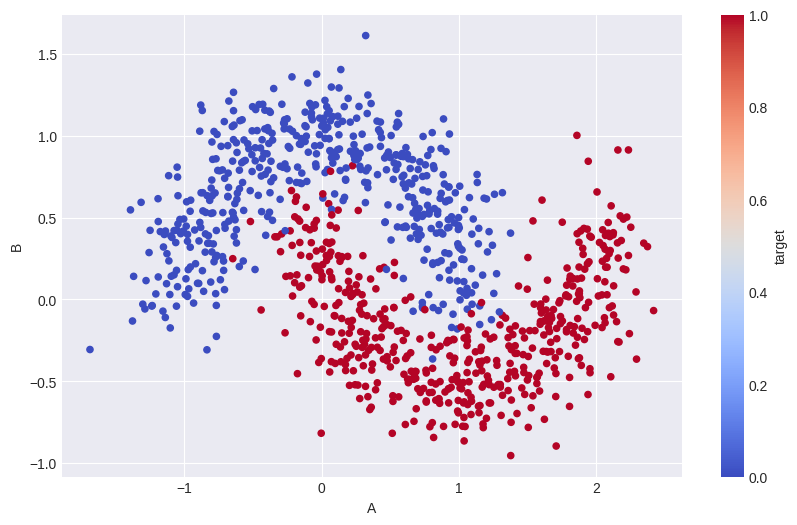

In [50]:
data_df.plot.scatter("A", "B", c = 'target', cmap = CMAP)

In [51]:
data_train, data_test = data_df.to_numpy()[:900], data_df.to_numpy()[900:]
display(data_train.shape)
type(data_train)

(900, 3)

numpy.ndarray

# Activation functions

In [52]:
def fn_acty(z):
    return np.tanh(z)

def fn_acty_prime(z):
    return 1 - np.tanh(z) ** 2

In [53]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))



In [54]:
def predict():
    z = 1
    return sigmoid(z)

### Split Data in Test Train

In [64]:
feature_df = data_df.drop("target", axis = 1)
labels = data_df['target']

x_train, x_test, y_train, y_test = train_test_split(feature_df,
                                                    labels,
                                                    random_state = RANDOM_STATE,
                                                    stratify = labels,
                                                    test_size = TEST_SIZE)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((800, 2), (200, 2), (800,), (200,))

In [65]:
# model_builder
def build_model(nn_hdim, x_t, y_t):
    """
    2 - 4 - 1
    """

    m, nn_input_dim = x_t.shape
    nn_output_shape = y_t.shape[1]

    w1 = rng.random((nn_input_dim, nn_hdim), dtype = np.float32) / np.sqrt(nn_input_dim)
    w2 = rng.random((nn_hdim, nn_output_shape), dtype = np.float32) / np.sqrt(nn_hdim)

    print(w1.shape, w2.shape)




In [66]:
# y_train = y_train.reshape(-1, 1)
y_train = pd.DataFrame({"target" : y_train}, index = y_train.index)
y_train.shape

(800, 1)

In [67]:
build_model(4, x_train, y_train)

# Decision Boundry

In [ ]:
def fn_plot_decision_boundary(wgts, x):

    fig, ax = plt.subplots(figsize = (8, 5))

    dm = 0.01

    x_min, x_max = x[:, 0].min(), x[:, 0].max()
    y_min, y_max = x[:, 1].min(), x[:, 1].max()

    xx, yy = np.meshgrid(np.arange(x_min, x_max, dm),
                         np.arange(y_min, y_max, dm))

    XX = np.c_[xx.ravel(), yy.ravel()]

    XX = np.hstack((XX, np.ones((XX.shape[0], 1))))

    y_pred = []

    for row in XX:
        y_p = predict(row, wgts)
        # pred = 1
        # if y_p < 0:
        #     pred = 0
        y_pred.append(0 if y_p < 0.5 else 1)

    Z = np.array(y_pred).reshape(xx.shape)

    ax.contourf(xx, yy, Z, alpha = 0.8, cmap = plt.cm.Paired)

    ax.scatter(x[:, 0], x[:, 1], c = x[:, 2], edgecolor = "k", cmap = CMAP)




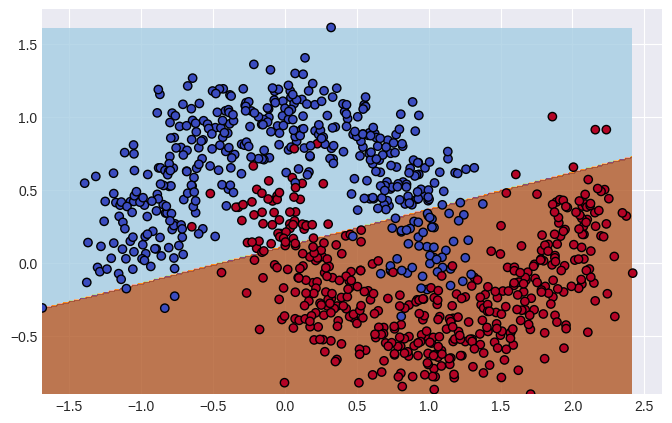

In [ ]:
fn_plot_decision_boundary(weights, data_train)

In [ ]:
# Accuracy

preds = []
for row in data_train:
    a = predict(row, weights)
    y_pred = 0
    if a >= 0.5 : y_pred = 1
    preds.append(y_pred)


accuracy_score(data_train[:, -1], preds)


0.8655555555555555

In [ ]:
cm = confusion_matrix(data_train[:, -1], preds)
disp = ConfusionMatrixDisplay(cm, display_labels = [0, 1])


array([[385,  57],
       [ 64, 394]])